Basic steps that need to be done to prepare the data to feed the machine learning models.
We need to keep in mind that each dataset is domain and data dependent. It is important to have a few knowledge of the data set to better make decisions.

Some considerations we need to take:
- correlation betwen the features and the label
- any outliers?
- any missing value? If so, what is the best approach? Drop the row or impute data?

The dataset is the wine quality. I made some modifications to better explain the basic steps we need to do to prepare the data to fit the model.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import os    
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'

C:\Users\alberto.beniste\.conda\envs\alberto_beniste\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.25.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


#### Import dataset and do a quick inspection

In [2]:
df = pd.read_csv("wine_quality_modified.csv")

In [3]:
df.head(4)

,id,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,1,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,26.0,6
1,2,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,20.0,6
2,3,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,4,7.2,0.23,0.32,8.5,NaN,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [4]:
# verbose paramter omits the columns, in case of a large number of feature
df.info(memory_usage=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    4898 non-null   int64  
 1   fixed acidity         4897 non-null   float64
 2   volatile acidity      4898 non-null   float64
 3   citric acid           4898 non-null   float64
 4   residual sugar        4898 non-null   float64
 5   chlorides             983 non-null    float64
 6   free sulfur dioxide   4898 non-null   float64
 7   total sulfur dioxide  4898 non-null   float64
 8   density               4896 non-null   float64
 9   pH                    4898 non-null   float64
 10  sulphates             4898 non-null   float64
 11  alcohol               4898 non-null   float64
 12  quality               4898 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 497.6 KB


In [5]:
# investigate the target and its distribution
df["quality"].value_counts().sort_index()

quality
3      20
4     163
5    1457
6    2198
7     880
8     175
9       5
Name: count, dtype: int64

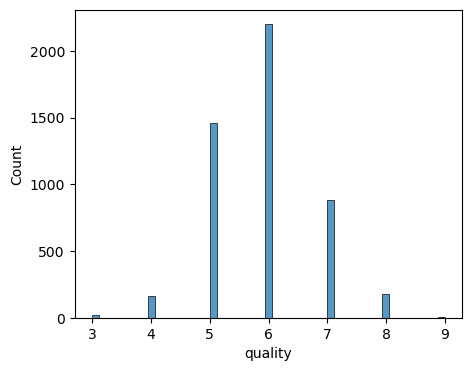

In [6]:
# we can see that the target is not well distribuited. 
# What we can do in this case, instead of predict multiple classes, we can turn this into a binary classification,
#   by combining classes 3 to 5 into label=0, and classes 6 to 9 into label=1
plt.figure(figsize=(5,4))
sns.histplot(df["quality"]);

In [7]:
df["quality_binary"] = 0
df["quality_binary"][df["quality"]  > 5] = 1
df.sample(5)

C:\Users\alberto.beniste\AppData\Local\Temp\ipykernel_26220\329463473.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["quality_binary"][df["quality"]  > 5] = 1


,id,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_binary
1913,1914,8.3,0.230,0.30,2.1,NaN,21.0,153.0,0.99530,3.09,0.50,9.6,6,1
2579,2580,6.4,0.280,0.56,1.7,NaN,49.0,106.0,0.99354,3.10,0.37,9.2,6,1
2567,2568,6.6,0.240,0.28,1.8,NaN,39.0,132.0,0.99182,3.34,0.46,11.4,5,0
2559,2560,5.7,0.255,0.65,1.2,NaN,17.0,137.0,0.99307,3.20,0.42,9.4,5,0
795,796,7.2,0.310,0.26,7.3,NaN,37.0,157.0,0.99625,3.09,0.43,9.0,5,0


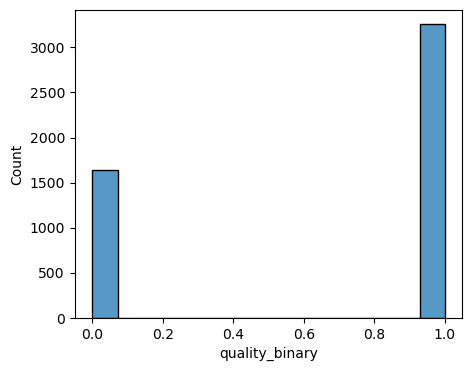

In [8]:
plt.figure(figsize=(5,4))
sns.histplot(df["quality_binary"]);

#### Verify outliers

In [9]:
# shows the correlation between each feature to the target. So we can see the features that are strong correlated to the target.
# we can see here that alcohol content is the highest correlation with quality.
df.corr()["quality"].sort_values()

density                -0.307372
chlorides              -0.216870
volatile acidity       -0.194723
total sulfur dioxide   -0.174737
fixed acidity          -0.113357
residual sugar         -0.097577
citric acid            -0.009209
free sulfur dioxide     0.008158
id                      0.035763
sulphates               0.053678
pH                      0.099427
alcohol                 0.426935
quality_binary          0.802541
quality                 1.000000
Name: quality, dtype: float64

<Axes: xlabel='quality', ylabel='alcohol'>

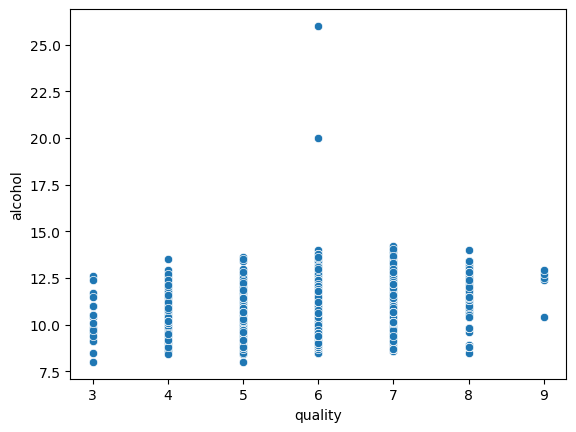

In [10]:
# it seems we hve two extreme values. You need to know that regular wine with this amount of alcohol is not common. This can mess up the model
# Even if we don't know about wine, we can see that the alcohol is concentrated between 6 and 15%. 
sns.scatterplot(data=df, y="alcohol", x="quality")

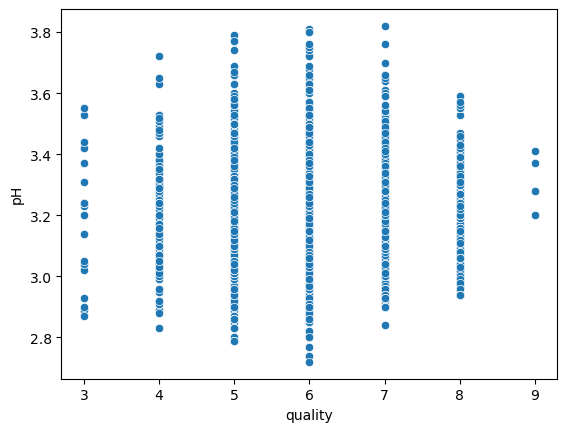

In [11]:
# pH seems fine without outliers
sns.scatterplot(data=df, y="pH", x="quality");

In [12]:
mask_alcohol = df["alcohol"] > 16
df[mask_alcohol]

,id,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_binary
0,1,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.001,3.0,0.45,26.0,6,1
1,2,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.994,3.3,0.49,20.0,6,1


In [13]:
# we can drop these rows
drop_rows = df[mask_alcohol].index
df = df.drop(index=drop_rows)

In [14]:
# the rows with indexes 0 and 1 were dropped.
df.head(3)

,id,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_binary
2,3,8.1,0.28,0.40,6.9,0.05,30.0,97.0,0.9951,3.26,0.44,10.1,6,1
3,4,7.2,0.23,0.32,8.5,NaN,47.0,186.0,0.9956,3.19,0.40,9.9,6,1
4,5,7.2,0.23,0.32,8.5,NaN,47.0,186.0,0.9956,3.19,0.40,9.9,6,1


#### Handle missing data

In [15]:
def percent_missing(df):
    """
    Return the percentage of missing value for all features
    """
    nan_perc = 100 * df.isnull().sum() / len(df)
    nan_perc = pd.Series(nan_perc[nan_perc > 0], name="nan_perc")
    
    nan_tot = df.isnull().sum()
    nan_tot = pd.Series(nan_tot[nan_tot > 0], name="total_nan")
    nan_tot = pd.DataFrame(nan_tot)
    
    return nan_tot.join(nan_perc).sort_values(by="nan_perc")


In [16]:
# if we look at the dataset, we can see there is the id column that is a key for each row as unique identifier. 
# This can be misinterpreted as an important feature leading to a wrong model. Let's drop it.
df.head()

,id,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_binary
2,3,8.1,0.28,0.40,6.9,0.05,30.0,97.0,0.9951,3.26,0.44,10.1,6,1
3,4,7.2,0.23,0.32,8.5,NaN,47.0,186.0,0.9956,3.19,0.40,9.9,6,1
4,5,7.2,0.23,0.32,8.5,NaN,47.0,186.0,0.9956,3.19,0.40,9.9,6,1
5,6,8.1,0.28,0.40,6.9,NaN,30.0,97.0,0.9951,3.26,0.44,10.1,6,1
6,7,6.2,0.32,0.16,7.0,NaN,30.0,136.0,NaN,3.18,0.47,9.6,6,1


In [17]:
df = df.drop(columns="id")

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4896 entries, 2 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4895 non-null   float64
 1   volatile acidity      4896 non-null   float64
 2   citric acid           4896 non-null   float64
 3   residual sugar        4896 non-null   float64
 4   chlorides             981 non-null    float64
 5   free sulfur dioxide   4896 non-null   float64
 6   total sulfur dioxide  4896 non-null   float64
 7   density               4894 non-null   float64
 8   pH                    4896 non-null   float64
 9   sulphates             4896 non-null   float64
 10  alcohol               4896 non-null   float64
 11  quality               4896 non-null   int64  
 12  quality_binary        4896 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 497.4 KB


In [19]:
# Let's see missing values in the data.
df.isnull().sum()

fixed acidity              1
volatile acidity           0
citric acid                0
residual sugar             0
chlorides               3915
free sulfur dioxide        0
total sulfur dioxide       0
density                    2
pH                         0
sulphates                  0
alcohol                    0
quality                    0
quality_binary             0
dtype: int64

In [20]:
# we only have two features with missing value
missing_values = percent_missing(df)
missing_values

,total_nan,nan_perc
fixed acidity,1,0.020425
density,2,0.040850
chlorides,3915,79.963235


In [21]:
# now we need to decide what to do with these three columns. 
# For fixed acidity, we have only one row with missing value, and for density only two rows. We can drop those three rows or
#   impute by computing the mean.
# Depending of the data, we can assign zero in case missing value means actually zero, or estimate ourselves based on the data with 
#   reasonable value, or use some statistics to estimate values.


In [22]:
# let's drop only the rows NaN for the column density.
df = df.dropna(axis=0, subset=["density"])

In [23]:
missing_values = percent_missing(df)
missing_values

,total_nan,nan_perc
fixed acidity,1,0.020433
chlorides,3913,79.955047


In [24]:
#  For fixed acidity, lets fill with mean
mean_value = df["fixed acidity"].mean()
df["fixed acidity"].fillna(value=mean_value, inplace=True)

In [25]:
missing_values = percent_missing(df)
missing_values

,total_nan,nan_perc
chlorides,3913,79.955047


In [26]:
# Now, for chlorides, we have a lot of missing values for the this column. In that case, we can drop the whole column.
# This feature does not hold any value for the dataset. 
df = df.drop(columns="chlorides")

In [27]:
missing_values = percent_missing(df)
missing_values

,total_nan,nan_perc


#### Save the the data frame

In [28]:
df.to_csv("wine_quality_modified_final.csv", index=False)